# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
import scipy.stats as stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")

df = pd.read_csv(airbnbDataSet_filename, header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

# Check Summary Statistics

In [4]:
df.head(10)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [5]:
df_summ = df.describe(include = 'all')
df_summ

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,28017,27452,18206,28022,27962,17077,16179.000000,16909.000000,28022,28022.000000,...,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
unique,27386,25952,15800,7566,1364,11962,NaN,NaN,1,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,We're located in a safe and quiet residential ...,Karen,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,NaN,NaN,True,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,61,34,246,16059,191,NaN,NaN,28022,NaN,...,NaN,NaN,NaN,20382,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.906901,0.791953,NaN,14.554778,...,4.808041,4.750393,4.647670,NaN,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,NaN,NaN,NaN,NaN,NaN,NaN,0.227282,0.276732,NaN,120.721287,...,0.464585,0.415717,0.518023,NaN,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.940000,0.680000,NaN,1.000000,...,4.810000,4.670000,4.550000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910000,NaN,1.000000,...,4.970000,4.880000,4.780000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,3.000000,...,5.000000,5.000000,5.000000,NaN,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000


In [6]:
print(df.columns.tolist())

['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'c

In [7]:
#Drop these columns to prevent feature leakage
df = df.drop('review_scores_value', axis=1)
df = df.drop('review_scores_cleanliness', axis=1)
df = df.drop('review_scores_communication', axis=1)
df = df.drop('review_scores_checkin', axis=1)
df = df.drop('review_scores_location', axis=1)

#Drop these columns since they are text, not numerical (If I had more time, I would use NLP for the columns of dtype: object)
df = df.drop('name', axis=1)
df = df.drop('description', axis=1)
df = df.drop('neighborhood_overview', axis=1)
df = df.drop('host_name', axis=1)
df = df.drop('host_location', axis=1)
df = df.drop('host_about', axis=1)
df = df.drop('amenities', axis=1)

#Dropped this column since it had 4 values related to NYC, not other places as well. I may decide to include this later on
df = df.drop('neighbourhood_group_cleansed', axis=1)

In [8]:
# YOUR CODE HERE
#Compute Summary Statistics
df_summ = df.describe(include = 'all')
df_summ



,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022,28022.000000,28022.000000,28022,28022,28022,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
unique,NaN,NaN,1,NaN,NaN,1,1,4,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,True,NaN,NaN,True,True,Entire home/apt,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,28022,NaN,NaN,28022,28022,15604,NaN,NaN,...,NaN,NaN,NaN,20382,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.906901,0.791953,NaN,14.554778,14.554778,NaN,NaN,NaN,2.874491,1.142174,...,6.820998,0.734601,4.683482,NaN,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,NaN,120.721287,120.721287,NaN,NaN,NaN,1.860251,0.421132,...,16.663019,1.696054,0.505857,NaN,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,NaN,1.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,...,0.000000,0.000000,4.600000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,NaN,1.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,...,1.000000,0.000000,4.830000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,NaN,3.000000,3.000000,NaN,NaN,NaN,4.000000,1.000000,...,6.000000,1.000000,5.000000,NaN,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000


# Replace Missing Values

In [9]:
#Check for Missing/Null Data
df.isnull().values.any()

True

In [10]:
#Sum of missing values for each column
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights      

In [11]:
# look for all columns with missing values
condition = nan_count != 0 

# get column names
col_names = nan_count[condition].index 
#print(col_names)

# convert column names to list
nan_cols = list(col_names) 
print(nan_cols)

['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']


In [12]:
#Look at dtype for each column that contains null values
nan_col_types = df[nan_cols].dtypes
nan_col_types

host_response_rate      float64
host_acceptance_rate    float64
bedrooms                float64
beds                    float64
dtype: object

In [13]:
#For columns with float64 dtype, change null values to mean values

mean_host_response_rate=df['host_response_rate'].mean()
df['host_response_rate'].fillna(value=mean_host_response_rate, inplace=True)

mean_host_acceptance_rate = df['host_acceptance_rate'].mean()
df['host_acceptance_rate'].fillna(value=mean_host_acceptance_rate, inplace=True)

mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].fillna(value=mean_bedrooms, inplace=True)

mean_beds = df['beds'].mean()
df['beds'].fillna(value=mean_beds, inplace=True)

In [14]:
#Check if null values have been take care of
sum_host_response_rate = np.sum(df['host_response_rate'].isnull(), axis = 0)
sum_host_response_rate

0

In [15]:
#Check if null values have been take care of
sum_host_acceptance_rate = np.sum(df['host_acceptance_rate'].isnull(), axis = 0)
sum_host_acceptance_rate

0

In [16]:
#Check if null values have been take care of
sum_bedrooms = np.sum(df['bedrooms'].isnull(), axis = 0)
sum_bedrooms

0

In [17]:
#Check if null values have been take care of
sum_beds = np.sum(df['beds'].isnull(), axis = 0)
sum_beds

0

# Check for/Take care of Outliers

In [18]:
df.shape

(28022, 37)

In [19]:
#check the means and medians
mean_median_std_summary = df_summ.loc[['mean', '50%']]

print(mean_median_std_summary)

      host_response_rate  host_acceptance_rate host_is_superhost  \
mean            0.906901              0.791953               NaN   
50%             1.000000              0.910000               NaN   

      host_listings_count  host_total_listings_count host_has_profile_pic  \
mean            14.554778                  14.554778                  NaN   
50%              1.000000                   1.000000                  NaN   

     host_identity_verified room_type  accommodates  bathrooms  ...  \
mean                    NaN       NaN      2.874491   1.142174  ...   
50%                     NaN       NaN      2.000000   1.000000  ...   

      number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
mean               6.820998                0.734601              4.683482   
50%                1.000000                0.000000              4.830000   

      instant_bookable  calculated_host_listings_count  \
mean               NaN                          9.5819   
5

In [20]:
#Use Winsorization to get rid of outliers
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()

for column in numeric_columns:
    winsorized_col = stats.mstats.winsorize(df[column], limits=[0.05,0.05])
    df[column] = winsorized_col

In [21]:
#Make sure the size of dataset hasn't changed
df.shape

(28022, 37)

In [22]:
#Get summary statistics again
df_summ = df.describe(include = 'all')
df_summ

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022,28022,28022,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022.000000,28022.0,28022.000000,28022.000000
unique,NaN,NaN,1,NaN,NaN,1,1,4,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,True,NaN,NaN,True,True,Entire home/apt,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,28022,NaN,NaN,28022,28022,15604,NaN,NaN,...,NaN,NaN,NaN,20382,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.928433,0.802358,NaN,5.031796,5.031796,NaN,NaN,NaN,2.755085,1.124063,...,5.743059,0.637392,4.732280,NaN,5.509921,1.984369,1.397259,0.0,1.334580,5.132039
std,0.081940,0.181079,NaN,10.344435,10.344435,NaN,NaN,NaN,1.445983,0.311958,...,9.779654,1.193952,0.304134,NaN,11.717121,4.530548,2.490134,0.0,1.789951,1.868729
min,0.670000,0.280000,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,...,0.000000,0.000000,4.000000,NaN,1.000000,0.000000,0.000000,0.0,0.030000,2.000000
25%,0.906901,0.791953,NaN,1.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,...,0.000000,0.000000,4.600000,NaN,1.000000,0.000000,0.000000,0.0,0.130000,4.000000
50%,0.906901,0.791953,NaN,1.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,...,1.000000,0.000000,4.830000,NaN,1.000000,1.000000,0.000000,0.0,0.510000,5.000000
75%,1.000000,0.950000,NaN,3.000000,3.000000,NaN,NaN,NaN,4.000000,1.000000,...,6.000000,1.000000,5.000000,NaN,3.000000,1.000000,1.000000,0.0,1.830000,7.000000


In [23]:
#Check mean and median to make sure values have improved
mean_median_std_summary = df_summ.loc[['mean', '50%']]

print(mean_median_std_summary)

      host_response_rate  host_acceptance_rate host_is_superhost  \
mean            0.928433              0.802358               NaN   
50%             0.906901              0.791953               NaN   

      host_listings_count  host_total_listings_count host_has_profile_pic  \
mean             5.031796                   5.031796                  NaN   
50%              1.000000                   1.000000                  NaN   

     host_identity_verified room_type  accommodates  bathrooms  ...  \
mean                    NaN       NaN      2.755085   1.124063  ...   
50%                     NaN       NaN      2.000000   1.000000  ...   

      number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
mean               5.743059                0.637392               4.73228   
50%                1.000000                0.000000               4.83000   

      instant_bookable  calculated_host_listings_count  \
mean               NaN                        5.509921   
5

# Checking for correlations between features

In [24]:
#Put correlation values from greatest to least
corrs = df.corr()['review_scores_rating']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

review_scores_rating                            1.000000
host_response_rate                              0.079750
number_of_reviews_l30d                          0.070433
price                                           0.069346
n_host_verifications                            0.046974
number_of_reviews                               0.036729
number_of_reviews_ltm                           0.033901
reviews_per_month                               0.030716
bedrooms                                        0.017033
accommodates                                    0.003683
beds                                           -0.003697
bathrooms                                      -0.004639
host_acceptance_rate                           -0.005974
minimum_maximum_nights                         -0.034080
maximum_nights_avg_ntm                         -0.035560
maximum_maximum_nights                         -0.037502
calculated_host_listings_count_entire_homes    -0.041770
maximum_nights                 

In [25]:
#Get top three features that are highly correlated with the label: review_scores_rating
ans = corrs_sorted[1:4].index
top_three_corr = list(ans)
top_three_corr

['host_response_rate', 'number_of_reviews_l30d', 'price']

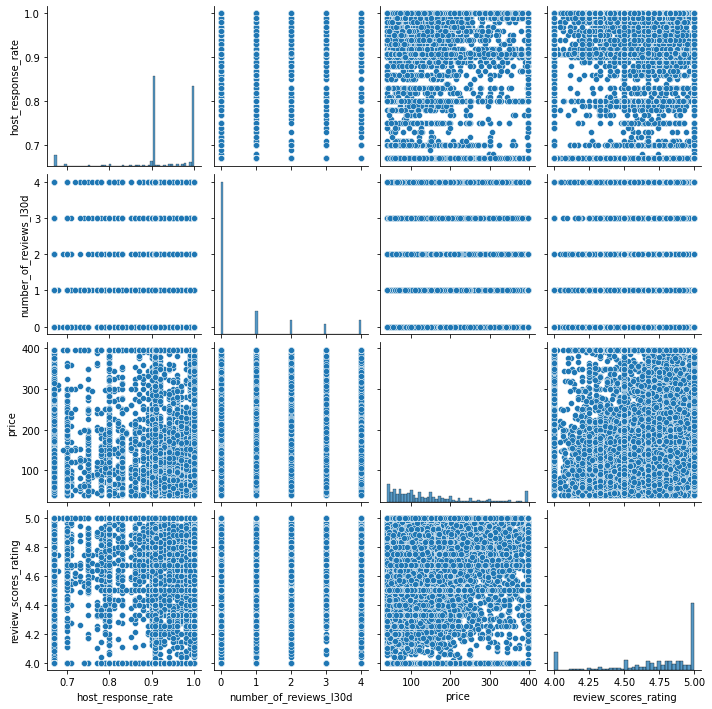

In [26]:
#Create seaborne pairplot for top three highly correlated features with label
top_three_corr.append('review_scores_rating')

df_sub = df[top_three_corr]
sns.pairplot(data=df_sub)

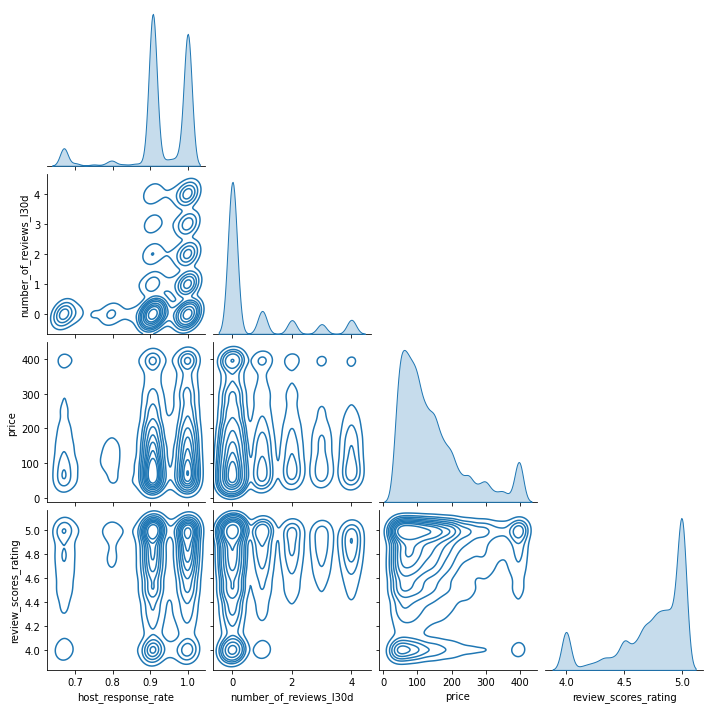

In [27]:
#specify the kernel density estimator as the kind of plot
sns.pairplot(data=df_sub, kind = 'kde', corner=True)

# One Hot Encoding

In [28]:
df.dtypes

host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
minimum_maximum_nights                          

In [29]:
to_encode = list(df.select_dtypes(include=['object']).columns)
#to_encode = df.columns.tolist()

to_encode

['room_type']

In [30]:
df[to_encode].nunique()

room_type    4
dtype: int64

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)

# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))

# Reinstate the original column names:
df_enc.columns = encoder.get_feature_names(to_encode)

df_enc.head()

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [32]:
df.drop(columns = to_encode, inplace=True)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.800000,0.280000,True,8.0,8.0,True,True,1,1.0,1.329708,...,0,0,4.70,False,3,3,0,0,0.33,8
1,0.670000,0.690000,True,1.0,1.0,True,True,3,1.0,1.000000,...,32,0,4.45,False,1,1,0,0,4.86,6
2,1.000000,0.280000,True,1.0,1.0,True,True,4,1.5,2.000000,...,1,0,5.00,False,1,1,0,0,0.03,3
3,1.000000,1.000000,True,1.0,1.0,True,True,2,1.0,1.000000,...,33,2,4.21,False,1,0,1,0,3.68,4
4,0.906901,0.791953,True,1.0,1.0,True,True,1,1.0,1.000000,...,0,0,4.91,False,1,0,1,0,0.87,7


In [33]:
df = df.join(df_enc)

In [34]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'room_type_Entire home/apt',
       'room_

In [35]:
df.shape

(28022, 40)

In [36]:
print(df['review_scores_rating'])

0        4.70
1        4.45
2        5.00
3        4.21
4        4.91
         ... 
28017    5.00
28018    5.00
28019    4.00
28020    5.00
28021    5.00
Name: review_scores_rating, Length: 28022, dtype: float64


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

# Random Forest Model

In [37]:
#Create Labelled Examples
y = df['review_scores_rating'] 
X = df.drop(columns = 'review_scores_rating', axis=1)

#Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1234)

#X_train.head()

In [38]:
print('Begin Random Forest Implementation...')
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'

# YOUR CODE HERE
rf_20_model = regressor = RandomForestRegressor(n_estimators=20, random_state=0)

# 2. Fit the model to the training data below

# YOUR CODE HERE
rf_20_model.fit(X_train, y_train)

# 3. Create the RandomForestClassifier model object below and assign to variable 'rf_100_model'

# YOUR CODE HERE
rf_100_model = regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# 4. Fit the model to the training data below

# YOUR CODE HERE
rf_100_model.fit(X_train, y_train)


print('End')

Begin Random Forest Implementation...
End


In [39]:
# Predicting the target values of the test set
y_pred = rf_20_model.predict(X_test)

In [40]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.301


In [41]:
errors = abs(y_pred - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.23 degrees.


In [42]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.04 %.


In [43]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, rf_20_model.predict(X_train)))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
 

R2 Value: 0.8417232924335292
Accuracy 95.0360832053637


# K Fold Cross Validation, Model Selection, Feature Selection

In [44]:
from sklearn.model_selection import cross_val_score

# Use function cross_val_score() to perform 5-fold cross-validation on the training data and 
# save the result to variable accuracy_scores
print('Running Cross-Validation...')

accuracy_scores = cross_val_score(rf_20_model, X_train, y_train, cv=5)

print('Done')

# Print the accuracy scores
print('Accuracies for the five training/test iterations on the validation sets:')
print(accuracy_scores)

Running Cross-Validation...
Done
Accuracies for the five training/test iterations on the validation sets:
[0.02199256 0.03202223 0.02560884 0.01623002 0.01727152]


In [45]:
# Find the mean accuracy score and save to variable 'acc_mean'
acc_mean = accuracy_scores.mean()
print('The mean accuracy score across the five iterations:')
print(acc_mean)


# Find the standard deviation of the accuracy score and save to variable 'acc_std'

acc_std = accuracy_scores.std()

# Print the standard deviation of the accuracy scores using the std() method to see the degree of variance.
print('The standard deviation of the accuracy score across the five iterations:')
print(acc_std)

The mean accuracy score across the five iterations:
0.022625034163621494
The standard deviation of the accuracy score across the five iterations:
0.005782156362852692


In [46]:
hyperparams = [2**n for n in range(2,5)]
hyperparams

[4, 8, 16]

In [47]:
print('Running k-fold Cross-Validation...')

accuracy_scores = []

for md in hyperparams:
    
    # 1. Create a Random Forest model object
    model = RandomForestRegressor(max_depth=md, min_samples_leaf=1)
    
    # 2. Perform a k-fold cross-validation for the decision tree
    acc_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # 3. Find the mean of the resulting accuracy scores 
    acc_mean = np.mean(acc_scores)
    
    # 4. Append the mean score to the list accuracy_scores
    accuracy_scores.append(acc_mean)
    
print('Done\n')

for s in range(len(accuracy_scores)):
    print('Accuracy score for max_depth {0}: {1}'.format(hyperparams[s], accuracy_scores[s]))

Running k-fold Cross-Validation...
Done

Accuracy score for max_depth 4: 0.06416408326344414
Accuracy score for max_depth 8: 0.09234634110625473
Accuracy score for max_depth 16: 0.08784838640126347


In [48]:
from sklearn.model_selection import validation_curve

In [49]:
print('Running Validation Curve Implementation...')

# Create a Random Forest model object without supplying arguments
model = RandomForestRegressor()

# Create a range of hyperparameter values for 'max_depth'.
hyperparams = [2**n for n in range(2,5)]

# Call the validation_curve() function with the appropriate parameters
training_scores, validation_scores = validation_curve(model, X_train, y_train, param_name = "max_depth", param_range = hyperparams, cv = 5)

print('Done\n')

print(validation_scores)

Running Validation Curve Implementation...
Done

[[0.06758531 0.07383192 0.066649   0.05245738 0.05949584]
 [0.09627185 0.1076106  0.09386667 0.08003523 0.08468882]
 [0.09223617 0.09802047 0.08421895 0.07133023 0.08666894]]


In [50]:
mean_validation_scores = np.mean(validation_scores, axis = 1)
for h in range(0, len(hyperparams)):
    print('Results of cross-validation for max_depth of {0}: {1}'.format(hyperparams[h], mean_validation_scores[h]))
    

Results of cross-validation for max_depth of 4: 0.06400389041234071
Results of cross-validation for max_depth of 8: 0.09249463486489914
Results of cross-validation for max_depth of 16: 0.08649495255653192


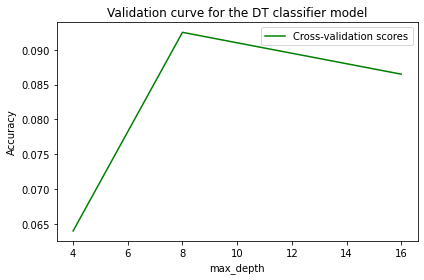

In [51]:
sns.lineplot(x=hyperparams, y=mean_validation_scores, label = "Cross-validation scores", color = 'g')

plt.title("Validation curve for the DT classifier model")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')

plt.show()

In [52]:
# Create a range of hyperparameter values for 'max_depth'. 
#Note these are the same values as those we used above
hyperparams_depth = [2**n for n in range(2,5)]

# Create a range of hyperparameter values for 'min_samples_leaf'. 
hyperparams_leaf = [25*2**n for n in range(0,3)]

# Create parameter grid.
param_grid={'max_depth':hyperparams_depth, 'min_samples_leaf':hyperparams_leaf}
param_grid

{'max_depth': [4, 8, 16], 'min_samples_leaf': [25, 50, 100]}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
print('Running Grid Search...')

# 1. Create a RandomForestRegressor model object without supplying arguemnts
model = RandomForestRegressor()

# 2. Run a Grid Search with 5-fold cross-validation using the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv=5)


# 3. Fit the model on the training data and assign the fitted model to the 
#    variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [55]:
# Print best-performing hyperparameter configuration
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

# print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Optimal hyperparameters: {'max_depth': 16, 'min_samples_leaf': 25}
Accuracy score: 0.09619803652672569


In [57]:
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf

# Print best performing hyperparameter configuration
print('Best value for max depth: {0}'.format(best_md))
print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))

# Print best accuracy score resulting from this configuration

print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for max depth: 16
Best value for the minimum number of samples required to be at a leaf node: 25
Accuracy score: 0.09619803652672569


In [61]:
#1. Obtain "feature importance" scores from the model object and save the array to the variable 
# 'feature_imp'

feature_imp = model.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores. 
# Save the result to the variable 'df_features'

df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})

#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'

df_sorted = df_features.sort_values(by='imp', ascending=False)

#4. Obtain the top 5 sorted feature names and save the result to list 'top_five' 

top_five = df_sorted.iloc[:5]['name'].values.tolist()
print('Top five features: {0}'.format(top_five))


Top five features: ['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'calculated_host_listings_count_private_rooms']


Text(0, 0.5, 'Normalized importance')

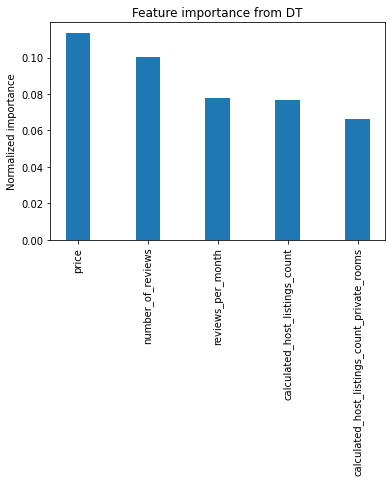

In [62]:
fig, ax = plt.subplots()
ax.bar(np.arange(5), sorted(model.feature_importances_, reverse=True)[:5], width = 0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

It seems like overall, there might not be a lot of variety in the data. The overall rating of an Airbnb is highly correlated with the other features that represented the rating of various aspects of the Airbnb (I dropped these columns to prevent feature leakage). This model has low accuracy, and the remaining features don't really help with predicting the rating of an Airbnb. I could try to use NLP to process the columns of dtype object (which I dropped earlier), or I could use another Airbnb data set.   